In [47]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [48]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [49]:
from bitarray import bitarray

In [50]:
# @profile
def read_grid(filename):
    grid = []
    with open(filename) as f:
        w, h = map(int, f.readline().split(maxsplit=1))
        
        for y in range(h+2):
            grid.append(bitarray(w+2))
        
        for no, line in enumerate(f):
            try:
                y, x = map(int, line.split(maxsplit=1))

                if y < 0 or x < 0:
                    raise ValueError

            except ValueError:
                raise Exception(f"Invalid cell on line {no + 2}.")

            grid[y+1][x+1] = 1

    return grid

Rules:
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [51]:
# @profile
def tick(grid):
    h, w = len(grid)-2, len(grid[0])-2

    nextgrid = []
    for y in range(h+2):
        nextgrid.append(bitarray(w+2))

    for y, row in enumerate(grid[1:-1]):
        for x, cell in enumerate(row[1:-1]):
            count = + grid[y][x]  + grid[y][x+1]  +grid[y][x+2]   + grid[y+1][x]   + grid[y+1][x+2]   + grid[y+2][x]  + grid[y+2][x+1]  + grid[y+2][x+2]
            nextgrid[y+1][x+1] = 1 if count == 3 or (cell and count == 2) else 0

    return nextgrid

In [52]:
filename = "data/input_5x5.txt"

In [53]:
%lprun -f read_grid read_grid(filename)
grid = read_grid(filename)

Timer unit: 1e-07 s

Total time: 0.000759 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\4255227244.py
Function: read_grid at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def read_grid(filename):
     3         1         15.0     15.0      0.2      grid = []
     4         2       5402.0   2701.0     71.2      with open(filename) as f:
     5         1        931.0    931.0     12.3          w, h = map(int, f.readline().split(maxsplit=1))
     6                                                   
     7         8         96.0     12.0      1.3          for y in range(h+2):
     8         7        315.0     45.0      4.2              grid.append(bitarray(w+2))
     9                                                   
    10         6        398.0     66.3      5.2          for no, line in enumerate(f):
    11         5         38.0      7.6      0.5              try:
    12         5        151.0     30

In [54]:
grid

[bitarray('0000000'),
 bitarray('0000000'),
 bitarray('0001000'),
 bitarray('0000100'),
 bitarray('0011100'),
 bitarray('0000000'),
 bitarray('0000000')]

In [55]:
%lprun -f tick tick (grid)
nextgrid = tick(grid)

Timer unit: 1e-07 s

Total time: 0.0003507 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\2617769216.py
Function: tick at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def tick(grid):
     3         1        202.0    202.0      5.8      h, w = len(grid)-2, len(grid[0])-2
     4                                           
     5         1         20.0     20.0      0.6      nextgrid = []
     6         8        117.0     14.6      3.3      for y in range(h+2):
     7         7        190.0     27.1      5.4          nextgrid.append(bitarray(w+2))
     8                                           
     9         6        130.0     21.7      3.7      for y, row in enumerate(grid[1:-1]):
    10        30        683.0     22.8     19.5          for x, cell in enumerate(row[1:-1]):
    11        25       1593.0     63.7     45.4              count = + grid[y][x]  + grid[y][x+1]  +grid[y][x+2]   + grid[y+1][x] 

In [56]:
nextgrid

[bitarray('0000000'),
 bitarray('0000000'),
 bitarray('0000000'),
 bitarray('0010100'),
 bitarray('0001100'),
 bitarray('0001000'),
 bitarray('0000000')]

In [57]:
num_generations = 4

nextgrid = grid.copy()
for i in range(num_generations):
    nextgrid = tick(nextgrid)

nextgrid

[bitarray('0000000'),
 bitarray('0000000'),
 bitarray('0000000'),
 bitarray('0000100'),
 bitarray('0000010'),
 bitarray('0001110'),
 bitarray('0000000')]

**Memory Profiler Results for the same code**


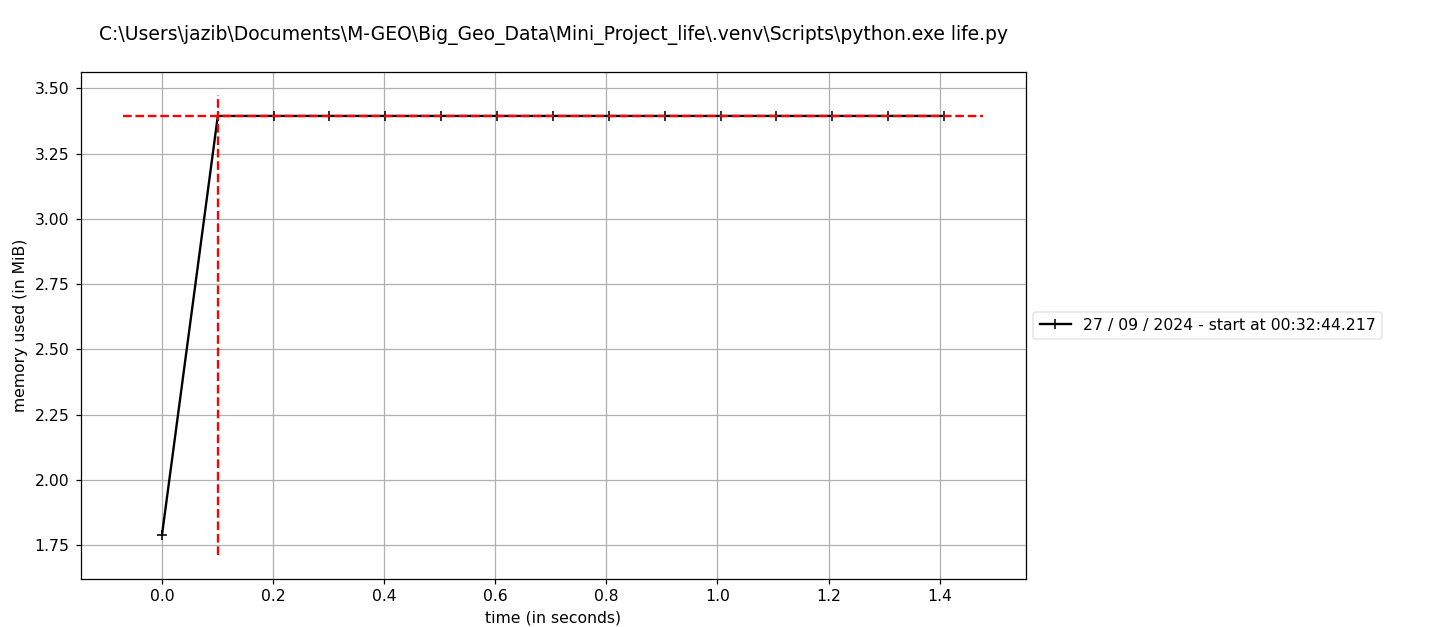